In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [32]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | lagoa
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | port macquarie
Processing Record 5 of Set 1 | korla
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | marcona
City not found. Skipping...
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | marsh harbour
Processing Record 12 of Set 1 | aleksandrov gay
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | barra patuca
Processing Record 18 of Set 1 | lena
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | rikitea
Proce

Processing Record 36 of Set 4 | taoudenni
Processing Record 37 of Set 4 | sinegorye
Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | tamandare
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | gamba
Processing Record 44 of Set 4 | tual
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | tefe
Processing Record 48 of Set 4 | oktyabrskoye
Processing Record 49 of Set 4 | port hardy
Processing Record 0 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | axim
Processing Record 2 of Set 5 | mount darwin
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | mulchen
Processing Record 5 of Set 5 | salalah
Processing Record 6 of Set 5 | cap-aux-meules
Processing Record 7 of Set 5 | butaritari
Processing Record 8 of Set 5 | formosa do rio preto
Processing Record

Processing Record 26 of Set 8 | berlevag
Processing Record 27 of Set 8 | strezhevoy
Processing Record 28 of Set 8 | halalo
City not found. Skipping...
Processing Record 29 of Set 8 | mamallapuram
Processing Record 30 of Set 8 | qaqortoq
Processing Record 31 of Set 8 | lasa
Processing Record 32 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 8 | henties bay
Processing Record 34 of Set 8 | kudahuvadhoo
Processing Record 35 of Set 8 | princeton
Processing Record 36 of Set 8 | severo-kurilsk
Processing Record 37 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 38 of Set 8 | artyk
City not found. Skipping...
Processing Record 39 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 40 of Set 8 | loukhi
Processing Record 41 of Set 8 | lere
Processing Record 42 of Set 8 | stankov
Processing Record 43 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 8 | taguatinga
Processing Record 45 of Set 8 | 

City not found. Skipping...
Processing Record 6 of Set 12 | krasnomayskiy
Processing Record 7 of Set 12 | kruisfontein
Processing Record 8 of Set 12 | dangriga
Processing Record 9 of Set 12 | burgeo
Processing Record 10 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 11 of Set 12 | paracuru
Processing Record 12 of Set 12 | mecca
Processing Record 13 of Set 12 | alofi
Processing Record 14 of Set 12 | tibati
Processing Record 15 of Set 12 | aykhal
Processing Record 16 of Set 12 | nelson bay
Processing Record 17 of Set 12 | saint-georges
Processing Record 18 of Set 12 | narasannapeta
Processing Record 19 of Set 12 | riyadh
Processing Record 20 of Set 12 | gemena
Processing Record 21 of Set 12 | rodino
Processing Record 22 of Set 12 | viligili
City not found. Skipping...
Processing Record 23 of Set 12 | kargopol
Processing Record 24 of Set 12 | kieta
Processing Record 25 of Set 12 | jackson
Processing Record 26 of Set 12 | cururupu
Processing Record 27 of Set 12 | yama

In [33]:
 # Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [34]:
 # Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.78,147.06,46.00,84,91,3.00,AU,1595348903
1,lagoa,39.05,-27.98,68.88,72,0,2.66,PT,1595348903
2,pangnirtung,66.15,-65.71,48.20,93,90,6.93,CA,1595348903
3,port macquarie,-31.43,152.92,48.99,88,89,7.67,AU,1595348903
4,korla,41.76,86.15,79.00,74,75,4.00,CN,1595348903


In [35]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.502826,15.834991,71.967030,66.626118,49.957066,7.858766,1.595349e+09
std,32.986774,89.420460,14.996184,21.426245,37.488994,5.039007,6.946408e+01
min,-54.800000,-175.200000,30.200000,2.000000,0.000000,0.180000,1.595349e+09
25%,-6.725000,-62.430000,60.800000,54.000000,12.500000,3.990000,1.595349e+09
50%,22.080000,21.550000,74.140000,70.000000,47.000000,6.930000,1.595349e+09
75%,47.645000,95.100000,82.920000,82.500000,90.000000,10.455000,1.595349e+09
max,78.220000,179.320000,115.390000,100.000000,100.000000,29.970000,1.595349e+09


In [36]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [37]:
 # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.78,147.06,46.00,84,91,3.00,AU,1595348903
1,lagoa,39.05,-27.98,68.88,72,0,2.66,PT,1595348903
2,pangnirtung,66.15,-65.71,48.20,93,90,6.93,CA,1595348903
3,port macquarie,-31.43,152.92,48.99,88,89,7.67,AU,1595348903
4,korla,41.76,86.15,79.00,74,75,4.00,CN,1595348903


In [38]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

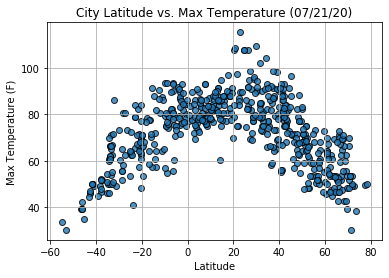

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

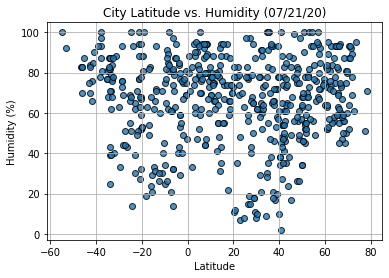

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

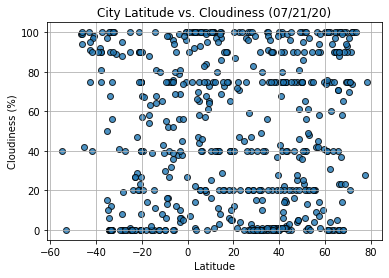

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

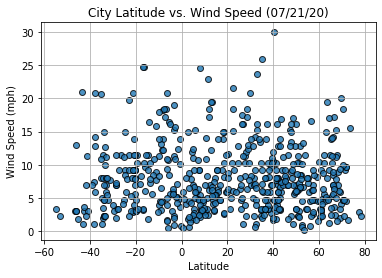

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [43]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-squared is: 0.47181850978594386


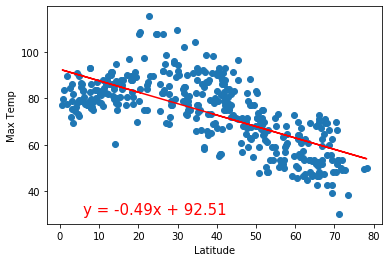

In [45]:
 # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.6151638174741518


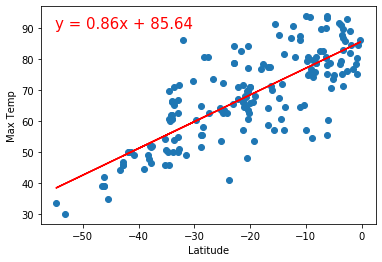

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The r-squared is: 2.6809304746059134e-05


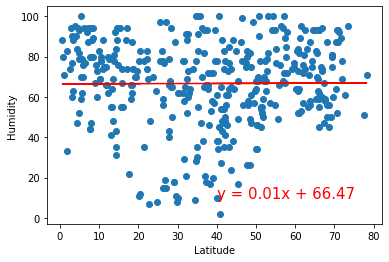

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

In [49]:
#no relationship between humidity and latitude*

The r-squared is: 0.0646963602849729


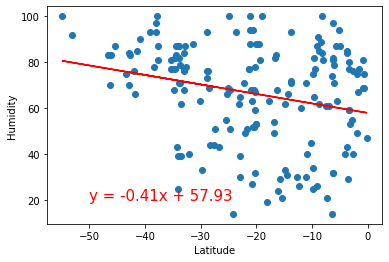

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

In [51]:
*no relationship between humidity and latitude*

SyntaxError: invalid syntax (<ipython-input-51-c86bc65c03f2>, line 1)

The r-squared is: 0.0001396102638425751


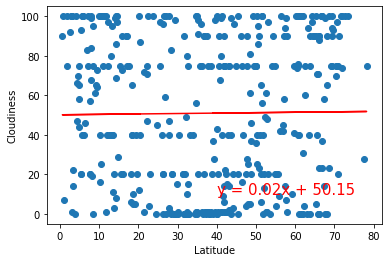

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.0077143058391038145


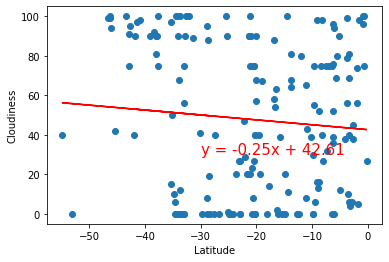

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r-squared is: 6.427470557064378e-05


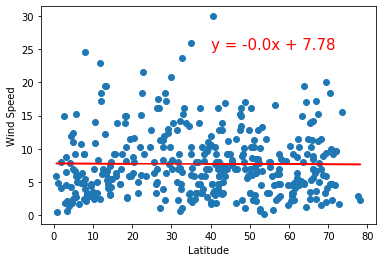

In [54]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: 0.02914001528636203


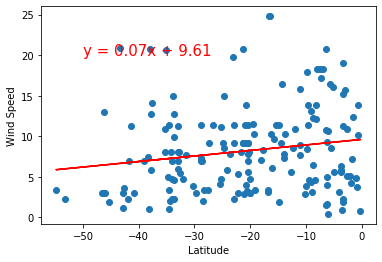

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))